In [2]:
pip install geopandas

     |████████████████████████████████| 1.0 MB 13.5 MB/s 
     |████████████████████████████████| 6.3 MB 53.5 MB/s 
     |████████████████████████████████| 16.7 MB 39.6 MB/s 


In [3]:
import pandas as pd
import geopandas as gpd

In [12]:
df_air = gpd.read_file('/content/vzduch.csv')
df_adr = gpd.read_file('/content/adresy.csv')

In [93]:
df_adr.head()

,X,Y,ObjectId,obec_nazev,cislo_domovni,cislo_orientacni_hodnota,cislo_orientacni_pismeno,ulice_nazev,cobce_nazev,psc,stavobj_kod,puvod,datum_exportu,GlobalID,geometry
0,16.6192365260001,49.197930086,1,Brno,503,36,,Cejl,Zábrdovice,60200,19023804,geometrie z DMB,2022/04/09 00:00:00+00,{0E8664CE-B764-4CE1-B2EF-47D19A00F184},None
1,16.6346821060001,49.2120119140001,2,Brno,168,51,,Dukelská třída,Husovice,61400,19074514,geometrie z DMB,2022/04/09 00:00:00+00,{623D79C4-808C-43FF-8A25-369759800C7A},None
2,16.5998515210001,49.2009248000001,3,Brno,471,29,,Veveří,Veveří,60200,19009470,geometrie z DMB,2022/04/09 00:00:00+00,{60D52A3C-C5C5-464A-A5A5-A030D61295E8},None
3,16.618346554,49.2340689430001,4,Brno,557,18,,Jurkovičova,Lesná,63800,19094621,geometrie z DMB,2022/04/09 00:00:00+00,{44E9CA08-0425-4224-BD98-105D7D24B428},None
4,16.6347521340001,49.194909894,5,Brno,3280,24,,Šámalova,Židenice,61500,19446969,geometrie z DMB,2022/04/09 00:00:00+00,{C8019433-F434-44E7-A071-8D0944542CBC},None


In [57]:
def mean(dataframe):
  f =  dataframe['pm10_1h'].tolist()
  n = list()
  for i in range(0, len(f)):
    if len(f[i]):
      n.append(float(f[i]))
  import statistics
  print(n)
  return statistics.mean(n)

In [ ]:
n = list()
for value in df_air['X'].unique():
  rslt_df = df_air[df_air['X'] == value]
  n.append(mean(rslt_df))

In [80]:
print(len(n))

10


In [121]:
df_air['X'].unique().tolist()

['16.569538',
 '16.593643',
 '16.696217',
 '16.613661',
 '16.580812',
 '16.613836',
 '16.6780240000001',
 '16.6270010000001',
 '16.6425170000001',
 '16.6162870000001']

In [102]:
df_air['Y'].unique()

array(['49.189621', '49.19809', '49.1489720000001', '49.185883',
       '49.16526', '49.2160870000001', '49.2132110000001',
       '49.1888310000001', '49.2081600000001', '49.202724'], dtype=object)

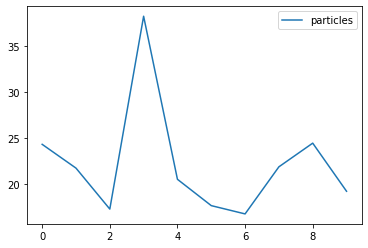

In [83]:
stations = pd.DataFrame({'X' : df_air['X'].unique().tolist(),
                                'Y' : df_air['Y'].unique().tolist(),
                                'particles' : n}, 
                                columns=['X','Y', 'particles'])
stations.plot()

In [ ]:
df_adr.head()

In [ ]:
pip install python-math

In [123]:
import math
x = df_air['X'].unique().tolist()
y = df_air['Y'].unique().tolist()
def closest(x1, y1):
  dist = math.inf
  min = (0 , 0)
  for x2, y2 in list(zip(x, y)):
    if math.hypot(float(x2)-float(x1), float(y2)- float(y1)) < dist:
      #staci tu dat if na obmedzenie vzdialenosti
      dist = math.hypot(float(x2)-float(x1), float(y2)- float(y1))
      min = (x2, y2)
  return min

particles = list()
for index, adres in df_adr.iterrows():
  best = closest(adres['X'], adres['Y'])
  particles.append(stations.loc[stations['X'] == best[0], 'particles'].iloc[0])

In [ ]:
len(particles)

In [125]:
import csv
with open('particles.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["pm10_1h"])
    for item in particles:
        writer.writerow([item])